In [1]:
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

tf.autograph.set_verbosity(2)

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from parameters import param_keys, general_keys
from modules.data_set_generic import Dataset
from scripts.plot_confusion_matrix import plot_confusion_matrix

# from sklearn.metrics import plot_confusion_matrix

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

from IPython.display import display_html
from glob import glob

np.random.seed(1)

In [2]:
beta5_paths = glob(
    os.path.join(
        PROJECT_PATH,
        "results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_*",
    )
)
beta5_paths

normal_model_paths = glob(
    os.path.join(
        PROJECT_PATH,
        "results/alerce_dataset_entropy_reg/DHNan0NormStampWBogusCropValLoss_*",
    )
)

In [3]:
# instance model and load weights

data_path = os.path.join("../../pickles", "training_set_Nov-26-2019.pkl")
# data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params_best_so_far = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: None,
}

model_list = []

normal_model_list = []

for model_path in normal_model_paths:
    graph = tf.Graph()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(graph=graph, config=config)

    with graph.as_default():
        regular_model = DeepHiTSNanNormCropStampModel(params_best_so_far, session=sess)
        checkpoint_path_best_so_far = os.path.join(model_path + "/checkpoints", "model")
        regular_model.load_model(checkpoint_path_best_so_far)
        normal_model_list.append(regular_model)

params_best_so_far.update({param_keys.ENTROPY_REG_BETA: 0.5})

for model_path in beta5_paths:
    graph = tf.Graph()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(graph=graph, config=config)

    with graph.as_default():
        regular_model = DeepHiTSEntropyRegModel(params_best_so_far, session=sess)
        checkpoint_path_best_so_far = os.path.join(model_path + "/checkpoints", "model")
        regular_model.load_model(checkpoint_path_best_so_far)
        model_list.append(regular_model)


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f261e4eeb00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Entity <function augment_with_rotations at 0x7f261e4eeb00> is not cached for key <code object augment_with_rotations at 0x7f261e4eea50, file "../modules/iterators/iterator_post_processing.py", line 46> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f2614187710>, frozenset())
INFO:tensorflow:Converting <function augment_with_rotations at 0x7f261e4eeb00>
INFO:tensorflow:Compiled output of <function augment_with_rotations at 0x7f261e4eeb00>:

# coding=utf-8
def tf__augment_with_rotations(img_batch, labels):
  do

Instructions for updating:
Use keras.layers.MaxPooling2D instead.
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f269c402350>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f269c402350>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f2617487f50>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f2617487f50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f2

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f26295900e0>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f261e4eeb00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Defaults o

INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f25dc7e2170> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f25dc7e2170> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f26295900e0>
    args:

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25dc6cec50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DHNan0NormStampWBogusCropValLoss_8_20191202-194624/checkpoints/model
INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f261e4eeb00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f25dc403050> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25dc365790>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f25dc3fa6d0>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f25dc3fa6d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25dc36cfd0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25dc36cfd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerc

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25dc0dc090>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f25b8659ad0>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f25b8659ad0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25b8659ad0>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25b8659ad0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f25b83e9590>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f25b83e9590>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f25b83e9590>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25b82f2f50>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25b82f2f50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f25b8111210>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f25b05dd8d0>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f25b05dd8d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f25b8076b90>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f25b8076b90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted 

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f25b027cfd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f25b027c610>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f25b027c610>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f25b0386e90>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f25b0386e90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted ca

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f258c681f10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f258c681d50>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f258c681d50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f258c687250>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f258c687250>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted 

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f26295900e0>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f258c31d090>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f258c31d090>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensor

INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f258016b320> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f258016b320> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f26295900e0>
    args:

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f261e4eeb00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f2540534170> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f2540534170> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f2540534170> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f26295900e0>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f261e4eeb00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) d

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f25026ef8c0> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f25026ef8c0> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f25026ef8c0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Conve

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f25025dcb10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25025e20d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f25025e20d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DHNan0NormStampWBogusCropValLoss_6_20191126-150625/checkpoints/model
INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f261e4eeb00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f24f8650e50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f24f8650e50>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f24f8650e50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f24f87b2ed0>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f24f87b2ed0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call o

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f24f8483250>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f24f84e4c10>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f24f84e4c10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f24f84dfe90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f24f84dfe90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f8066590>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f24f8074310>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f24f8074310>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f24f8074310>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f24f8074310>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bo

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f05690d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f0569310>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f0569310>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f05691d0>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f05691d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bou

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f00f3650>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f24cc798810>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f24cc798810>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f00f3f10>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24f00f3f10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Convert

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24cc4cfed0>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24cc4cfed0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24cc4cff10>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24cc4cff10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f24cc4d5190>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32)

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f26295900e0>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f24cc16de90>>
    ar

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f249c508680> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f249c508680> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f249c508680> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Conve

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f26295900e0>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f261e4eeb00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Defaults o

INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f2494675710> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f2494675710> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f262835cef0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f26295900e0>
    args:

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f24945facd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_0_20191202-164823/checkpoints/model
INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f261e4eeb00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f261e4eeb00>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f2494253200> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_ent

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f249405fe50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f2494252790>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f2494252790>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f24940a9710>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f24940a9710>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerc

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f247c44aad0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f247c44ab10>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f247c44ab10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f247c477d10>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f247c477d10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f247c252c50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f247c252c50>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f247c252c50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f247c2b5f10>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f247c2b5f10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f244c647790>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f244c62d450>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f244c62d450>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f244c539ed0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f244c539ed0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted 

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f244c18de90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f244c2a1910>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f244c2a1910>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f244c086210>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f244c086210>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted ca

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f242c59df10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f242c59da50>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f242c59da50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f242c5a32d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f242c5a32d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted 

In [4]:
train_set, val_set, test_set = model_list[0]._data_init()

  0%|          | 37/36262 [00:00<01:37, 369.80it/s]

{'AGN': 0, 'SN': 1, 'VS': 2, 'asteroid': 3, 'bogus': 4}


100%|██████████| 36262/36262 [01:18<00:00, 464.10it/s]


Label count AGN: 9996 -SN: 1079 -VS: 9938 -asteroid: 9899 -bogus: 5350 -
467 misshaped samples removed
Label count AGN: 9844 -SN: 1067 -VS: 9766 -asteroid: 9797 -bogus: 5321 -
4427 samples with NaNs. NaNs replaced with number 0


In [5]:
print(val_set.data_array.shape)
print(test_set.data_array.shape)

(250, 21, 21, 3)
(250, 21, 21, 3)


In [1]:
def get_roc(prob, labels, n_th=500):
    total_true = np.sum(labels == 1)
    total_false = np.sum(labels == 0)

    precision = []
    recall = []

    roc_x = []
    roc_y = []

    for th in np.linspace(start=0, stop=1, num=n_th):

        true_positive = np.sum(np.logical_and(prob >= th, labels == 1)) / np.sum(labels)
        true_negative = np.sum(np.logical_and(prob < th, labels == 0)) / np.sum(
            np.logical_not(labels)
        )
        false_positive = np.sum(np.logical_and(prob >= th, labels == 0)) / np.sum(
            np.logical_not(labels)
        )
        false_negative = np.sum(np.logical_and(prob < th, labels == 1)) / np.sum(labels)

        th_recall = true_positive / (true_positive + false_negative)
        th_precision = true_positive / (true_positive + false_positive)

        recall.append(th_recall)
        precision.append(th_precision)
        roc_x.append(false_positive)
        roc_y.append(true_positive)

    return np.array(roc_x), np.array(roc_y), np.linspace(start=0, stop=1, num=n_th)


def add_subplot_axes(ax, rect, axisbg="w"):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x, y, width, height], axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2] ** 0.5
    y_labelsize *= rect[3] ** 0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

In [6]:
roc_curves = []
normal_roc_curves = []
for i, model in enumerate(model_list):
    probabilities = model.predict_proba(test_set.data_array)
    sn_pred = probabilities[:, 1]
    sn_labels = test_set.data_label == 1
    roc_curves.append(get_roc(sn_pred, sn_labels))

    probabilities = normal_model_list[i].predict_proba(test_set.data_array)
    sn_pred = probabilities[:, 1]
    sn_labels = test_set.data_label == 1
    normal_roc_curves.append(get_roc(sn_pred, sn_labels))

roc_curves = np.stack(roc_curves)
normal_roc_curves = np.stack(normal_roc_curves)

In [7]:
roc_curves.shape

(10, 3, 500)

(3, 500)
(3, 500)
MAX DIFF 0.08303030303030301
[0.01212121 0.74393939]
y values at * 0.6609090909090909 0.7439393939393939
std values at * 0.04 0.03


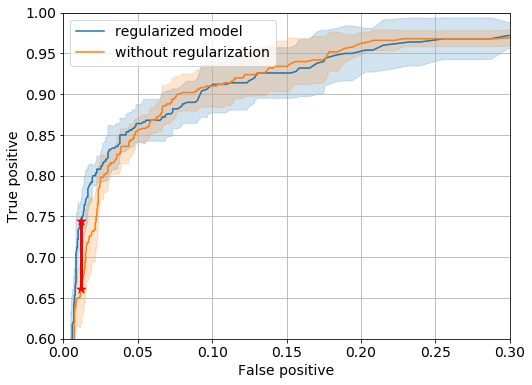

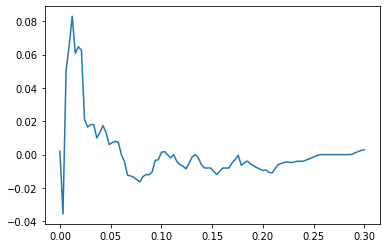

{'regularized model': array([0.002     , 0.44212121, 0.61121212, 0.71381818, 0.74393939,
       0.76921212, 0.79072727, 0.8       , 0.808     , 0.81654545,
       0.82684848, 0.834     , 0.836     , 0.84929293, 0.85339394,
       0.856     , 0.86      , 0.864     , 0.866     , 0.868     ,
       0.868     , 0.868     , 0.872     , 0.87519192, 0.87645455,
       0.882     , 0.88438384, 0.88881818, 0.89      , 0.89      ,
       0.89563636, 0.9045368 , 0.90693939, 0.91133333, 0.912     ,
       0.912     , 0.912     , 0.914     , 0.914     , 0.914     ,
       0.914     , 0.91548485, 0.91877273, 0.92460606, 0.926     ,
       0.926     , 0.926     , 0.926     , 0.926     , 0.926     ,
       0.926     , 0.92688312, 0.93015152, 0.932     , 0.932     ,
       0.9334    , 0.93703636, 0.9389899 , 0.9430303 , 0.94559307,
       0.94715909, 0.94844949, 0.9494596 , 0.95      , 0.95      ,
       0.95131987, 0.95266667, 0.954     , 0.954     , 0.95493506,
       0.95753247, 0.96003367, 0.9607070

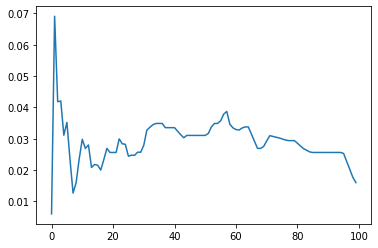

[0.         0.0030303  0.00606061 0.00909091 0.01212121 0.01515152
 0.01818182 0.02121212 0.02424242 0.02727273 0.03030303 0.03333333
 0.03636364 0.03939394 0.04242424 0.04545455 0.04848485 0.05151515
 0.05454545 0.05757576 0.06060606 0.06363636 0.06666667 0.06969697
 0.07272727 0.07575758 0.07878788 0.08181818 0.08484848 0.08787879
 0.09090909 0.09393939 0.0969697  0.1        0.1030303  0.10606061
 0.10909091 0.11212121 0.11515152 0.11818182 0.12121212 0.12424242
 0.12727273 0.13030303 0.13333333 0.13636364 0.13939394 0.14242424
 0.14545455 0.14848485 0.15151515 0.15454545 0.15757576 0.16060606
 0.16363636 0.16666667 0.16969697 0.17272727 0.17575758 0.17878788
 0.18181818 0.18484848 0.18787879 0.19090909 0.19393939 0.1969697
 0.2        0.2030303  0.20606061 0.20909091 0.21212121 0.21515152
 0.21818182 0.22121212 0.22424242 0.22727273 0.23030303 0.23333333
 0.23636364 0.23939394 0.24242424 0.24545455 0.24848485 0.25151515
 0.25454545 0.25757576 0.26060606 0.26363636 0.26666667 0.26969

In [8]:
def plot_roc(roc_curves_list, plot_labels, n_bars=1, fontsize=14, savepath=None):

    f, ax = plt.subplots(1, 1, figsize=(8, 6))

    colors = ["C0", "C1", "C2", "C3"]
    model_mean = {}
    model_std = {}
    for i, roc_curves in enumerate(roc_curves_list):

        roc_mean = np.mean(roc_curves, axis=0)
        roc_std = np.std(roc_curves, axis=0)
        print(roc_mean.shape)

        sort_index = np.argsort(roc_mean[0, ...])
        model_mean[plot_labels[i]] = np.interp(
            np.linspace(0, 0.3, num=100),
            roc_mean[0, ...][sort_index],
            roc_mean[1, ...][sort_index],
        )
        model_std[plot_labels[i]] = np.interp(
            np.linspace(0, 0.3, num=100),
            roc_mean[0, ...][sort_index],
            roc_std[1, ...][sort_index],
        )

        upper_limit = roc_mean[1, :] + roc_std[1, :] * n_bars
        lower_limit = roc_mean[1, :] - roc_std[1, :] * n_bars

        ax.fill_between(
            roc_mean[0, ...], roc_mean[1, ...], upper_limit, alpha=0.2, color=colors[i]
        )
        ax.fill_between(
            roc_mean[0, ...], roc_mean[1, ...], lower_limit, alpha=0.2, color=colors[i]
        )
        ax.plot(roc_mean[0, ...], roc_mean[1, ...], label=plot_labels[i])
        ax.set_xlabel("False positive", fontsize=fontsize)
        ax.set_ylabel("True positive", fontsize=fontsize)
        ax.tick_params(axis="both", labelsize=14)

        ### LINE GRADIENT ###
        """
        points = np.array([roc_mean[0, ...], roc_mean[1, ...]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        # Create a continuous norm to map from data points to colors
        norm = plt.Normalize(0, 1)
        lc = LineCollection(segments, cmap='viridis', norm=norm)
        # Set the values used for colormapping
        lc.set_array(roc_mean[2, ...])
        lc.set_linewidth(2)
        line = ax.add_collection(lc)"""

    # cbar = f.colorbar(line, ax=ax)
    # ticklabs = cbar.ax.get_yticklabels()
    # cbar.ax.set_yticklabels(ticklabs, fontsize=14)

    roc_diff = model_mean[plot_labels[0]] - model_mean[plot_labels[1]]
    print("MAX DIFF", np.amax(roc_diff))
    center_index = np.where(roc_diff == np.amax(roc_diff))[0]
    center = (
        np.linspace(0, 0.3, num=100)[center_index[0]],
        model_mean[plot_labels[0]][center_index[0]],
    )
    center = np.array(center)
    center[1] = center[1]
    # center = np.array([0.04, 0.85])
    print(center)
    print("y values at *", center[1] - np.amax(roc_diff), center[1])
    print("std values at *", 0.04, 0.03)

    size = 0.02
    ax.plot(
        [center[0], center[0]], (center[1], center[1] - np.amax(roc_diff)), "r", lw=3
    )
    ax.scatter(center[0], center[1], marker="*", s=80, color="r")
    ax.scatter(center[0], center[1] - np.amax(roc_diff), marker="*", s=80, color="r")
    """
    rect = patches.Rectangle(center-size/2,size,size,linewidth=3,edgecolor='C0',facecolor='none')
    # ax.text(center[0]+size*(3/4), center[1]-size/2, 'th=0.2', fontsize=fontsize, color="r")
    ax.add_patch(rect)
    """
    """
    center = np.array([0.15, 0.95])
    print(center)
    size=0.02
    rect = patches.Rectangle(center-size/2,size,size,linewidth=3,edgecolor='C1',facecolor='none')
    # ax.text(center[0]+size*(3/4), center[1]-size/2, 'th=0.2', fontsize=fontsize, color="r")
    ax.add_patch(rect)
    """
    plt.ylim([0.6, 1])
    plt.xlim([0, 0.3])

    ax.legend(fontsize=fontsize)
    ax.grid(which="both")
    if savepath is not None:
        plt.savefig(savepath, bbox_inches="tight")

    plt.show()

    plt.plot(
        np.linspace(0, 0.3, num=100),
        model_mean[plot_labels[0]] - model_mean[plot_labels[1]],
    )

    plt.show()
    print(model_mean)
    print(model_std)
    plt.plot(model_std[plot_labels[0]])
    plt.show()
    print(np.linspace(0, 0.3, num=100))
    print(roc_mean[0, ...], roc_mean[1, ...], roc_mean[2, ...])


plot_roc(
    [roc_curves, normal_roc_curves],
    plot_labels=["regularized model", "without regularization"],
    savepath="plots/roc_errors.pdf",
)

[[[1.         0.98       0.975      ... 0.         0.         0.        ]
  [1.         1.         1.         ... 0.         0.         0.        ]
  [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]]

 [[1.         1.         1.         ... 0.         0.         0.        ]
  [1.         1.         1.         ... 0.         0.         0.        ]
  [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]]

 [[1.         0.995      0.99       ... 0.         0.         0.        ]
  [1.         1.         1.         ... 0.         0.         0.        ]
  [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]]

 ...

 [[1.         1.         1.         ... 0.         0.         0.        ]
  [1.         1.         1.         ... 0.         0.         0.        ]
  [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]]

 [[1.         1.         0.995      ... 0.         0.         0.        ]
  [1.         1.        

No handles with labels found to put in legend.


[[0.076]
 [0.882]]
[0.015 0.768]
[0.012 0.74 ]


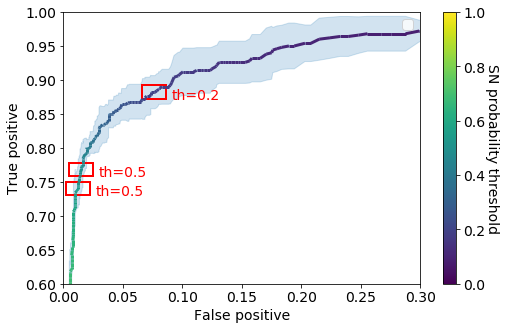

In [9]:
import matplotlib.patches as patches
from matplotlib.collections import LineCollection


def plot_zoom(roc_curves_list, n_bars=1, fontsize=14, savepath=None):

    f, ax = plt.subplots(1, 1, figsize=(8, 5))

    colors = ["C0", "C1", "C2", "C3"]

    for i, roc_curves in enumerate(roc_curves_list):

        print(roc_curves[:, :20])

        roc_mean = np.mean(roc_curves, axis=0)
        roc_std = np.std(roc_curves, axis=0)
        print(roc_mean.shape)

        upper_limit = roc_mean[1, :] + roc_std[1, :] * n_bars
        lower_limit = roc_mean[1, :] - roc_std[1, :] * n_bars

        ax.fill_between(
            roc_mean[0, ...], roc_mean[1, ...], upper_limit, alpha=0.2, color=colors[i]
        )
        ax.fill_between(
            roc_mean[0, ...], roc_mean[1, ...], lower_limit, alpha=0.2, color=colors[i]
        )
        # ax.plot(roc_mean[0, ...], roc_mean[1, ...], label=plot_labels[i])
        ax.set_xlabel("False positive", fontsize=fontsize)
        ax.set_ylabel("True positive", fontsize=fontsize)
        ax.tick_params(axis="both", labelsize=14)

        ### LINE GRADIENT ###

        points = np.array([roc_mean[0, ...], roc_mean[1, ...]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        # Create a continuous norm to map from data points to colors
        norm = plt.Normalize(0, 1)
        lc = LineCollection(segments, cmap="viridis", norm=norm)
        # Set the values used for colormapping
        lc.set_array(roc_mean[2, ...])
        lc.set_linewidth(3)
        line = ax.add_collection(lc)

    cbar = f.colorbar(line, ax=ax)
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label("SN probability threshold", fontsize=14, rotation=270, labelpad=14)

    plt.ylim([0.6, 1])
    plt.xlim([0, 0.3])

    ax.legend(fontsize=fontsize)

    ### TH=0.2
    th = 0.2
    center_index = np.where(
        np.abs(roc_mean[2, :] - th) == np.min(np.abs(roc_mean[2, :] - th))
    )[0]
    center = roc_mean[:2, center_index]
    print(center)
    size = 0.02
    rect = patches.Rectangle(
        center - size / 2, size, size, linewidth=2, edgecolor="r", facecolor="none"
    )
    ax.text(
        center[0] + size * (3 / 4),
        center[1] - size / 2,
        "th=0.2",
        fontsize=fontsize,
        color="r",
    )
    ax.add_patch(rect)

    ### TH=0.5

    th = 0.5
    center_index = np.where(
        np.abs(roc_mean[2, :] - th) == np.min(np.abs(roc_mean[2, :] - th))
    )[0]
    center = roc_mean[:2, center_index[0]]
    print(center)
    size = 0.02
    rect1 = patches.Rectangle(
        center - size / 2, size, size, linewidth=2, edgecolor="r", facecolor="none"
    )
    ax.text(
        center[0] + size * (3 / 4),
        center[1] - size / 2,
        "th=0.5",
        fontsize=fontsize,
        color="r",
    )
    ax.add_patch(rect1)
    ax.grid(which="both")

    ### TH=0.5
    th = 0.545
    center_index = np.where(
        np.abs(roc_mean[2, :] - th) == np.min(np.abs(roc_mean[2, :] - th))
    )[0]
    center = roc_mean[:2, center_index[0]]
    print(center)
    size = 0.02
    rect1 = patches.Rectangle(
        center - size / 2, size, size, linewidth=2, edgecolor="r", facecolor="none"
    )
    ax.text(
        center[0] + size * (3 / 4),
        center[1] - size / 2,
        "th=0.5",
        fontsize=fontsize,
        color="r",
    )
    ax.add_patch(rect1)
    ax.grid(which="both")

    if savepath is not None:
        plt.savefig(savepath, bbox_inches="tight")

    plt.show()


plot_zoom([roc_curves], savepath="plots/roc_zoom.pdf")

## F1 Score

In [13]:
from sklearn.metrics import accuracy_score, f1_score

In [10]:
model_list

In [21]:
data_set = [train_set, val_set, test_set]
data_set_name = ["train_set", "val_set", "test_set"]

In [31]:
results = {}
for i, subset in enumerate(data_set):
    print("###############")
    print(data_set_name[i])
    print("###############")
    micro_f1_list = []
    macro_f1_list = []
    accuracy_list = []
    for model in model_list:
        prediction = model.predict(subset.data_array)
        accuracy = accuracy_score(y_true=subset.data_label, y_pred=prediction)
        macro_F1_score = f1_score(
            y_true=subset.data_label, y_pred=prediction, average="macro"
        )
        micro_F1_score = f1_score(
            y_true=subset.data_label, y_pred=prediction, average="micro"
        )
        # print("accuracy", accuracy)
        # print("macro F1 score", np.round(macro_F1_score, 3))
        # print("micro F1 score", np.round(micro_F1_score, 3))

        micro_f1_list.append(micro_F1_score)
        macro_f1_list.append(macro_F1_score)
        accuracy_list.append(accuracy)

    results[data_set_name[i]] = {
        "accuracy": {"mean": np.mean(accuracy_list), "std": np.std(accuracy_list)},
        "macro_f1": {"mean": np.mean(macro_f1_list), "std": np.std(macro_f1_list)},
        "micro_f1": {"mean": np.mean(micro_f1_list), "std": np.std(micro_f1_list)},
    }

    print(results[data_set_name[i]])

###############
train_set
###############
{'accuracy': {'mean': 0.9174727298484203, 'std': 0.01150532609812384}, 'macro_f1': {'mean': 0.8883394015777757, 'std': 0.024017271409572754}, 'micro_f1': {'mean': 0.9174727298484203, 'std': 0.01150532609812384}}
###############
val_set
###############
{'accuracy': {'mean': 0.8911999999999999, 'std': 0.010998181667894026}, 'macro_f1': {'mean': 0.8901378288132802, 'std': 0.011337269201538047}, 'micro_f1': {'mean': 0.8911999999999999, 'std': 0.01099818166789406}}
###############
test_set
###############
{'accuracy': {'mean': 0.8720000000000001, 'std': 0.012521980673998834}, 'macro_f1': {'mean': 0.8715602330885259, 'std': 0.012508908941605919}, 'micro_f1': {'mean': 0.8719999999999999, 'std': 0.012521980673998847}}


In [25]:
train_set.data_array.shape

(35295, 21, 21, 3)